# Root finding, SVD and PCA

### Comparision of algorithms for root finding

Root Finding
The approximation $x_{i}$ given $x_{i-1}$ to the roots of<br><br>
$f(x) = 20x^{3}-50x^{2}+3x+20,\\
g(x) = e^{0.5x}-e^{0.6x}+4$<br><br>
using Newton's root finding algorithm is given by:
$$x_{i} = x_{i-1} - \frac{20x_{i-1}^{3} - 50x_{i-1}^{2} + 3x_{i-1} + 20}{60x_{i-1}^{2} - 100x_{i-1} + 3}$$
for $f(x)$ and
$$x_{i}=x_{i-1}-\frac{e^{0.5x_{i-1}} - e^{0.6x_{i-1}}+4}{0.5e^{0.5x_{i-1}} - 0.6e^{0.6x_{i-1}}}$$ 
for $g(x)$.<br><br>
By executing this algorithm starting at x = 0 and terminating when $|x_{i}-x_{i-1}|\leq0.0001$ we obtain the following data:

In [1]:
from sympy import *
import time
convergencePoint = 0.0001
i = 2
x = Symbol('x')
fx = 20*(x**3) - 50*(x**2) + 3*x + 20 #function f(x)
#fx = log(x) -1 + exp(-x)
fxp = diff(fx,x) #f'(x)
gx = exp(0.5*x) - exp(0.6*x) + 4 #function g(x)
gxp = diff(gx,x) #g'(x)

#x0 represents xi-1 and x1 represents xi during the algorithm
x0 = 0
x1 = x0 - (fx.subs(x,x0)/fxp.subs(x,x0)) #xi-1 - f(xi-1)/f'(xi-1)

print("Iteration"+" "*5+"xi"+ " "*7 + "  f(xi)")
print("%2d"%0+" "*11 + "%.5f    %.5f" % (x0,fx.subs(x,x0)))
print("%2d"%1+" "*11 + "%.5f    %.5f" % (x1,fx.subs(x,x1)))

while(abs(fx.subs(x,x1) - fx.subs(x,x0)) > convergencePoint): #while |f(xi) - f(xi-1)| > convergene point
    x0 = x1
    x1 = x1 - (fx.subs(x,x1)/fxp.subs(x,x1)) 
    print("%2d"%i + " "*11 +"%.5f  %.5f" % (x1,fx.subs(x,x1)))
    i = i+1
print("\n\n")

#reinitialize values
i = 2
x0 = 0
x1 = x0 - (gx.subs(x,x0)/gxp.subs(x,x0))

print("Iteration"+" "*5+"xi"+ " "*7 + "  g(xi)")
print("%2d"%0+" "*11 + "%.5f   %.5f" % (x0,gx.subs(x,x0)))
print("%2d"%1+" "*11 + "%.5f   %.5f" % (x1,gx.subs(x,x1)))

while(abs(gx.subs(x,x1) - gx.subs(x,x0)) > convergencePoint):
    x0 = x1
    x1 = x1 - (gx.subs(x,x1)/gxp.subs(x,x1))
    print("%2d"%i + " "*11 +"%.5f   %.5f" % (x1,gx.subs(x,x1)))
    i = i+1
    
#Applied with initial x = 1 for f(x) for comparision with bisection method  
print("\n\nThe next table displays the results with starting with x = 1.")
print("This addtional results are useful for the comparision with the bisection method.\n")
start_time = time.time()
i = 2
x0 = 1
x1 = x0 - (fx.subs(x,x0)/fxp.subs(x,x0))

print("Iteration"+" "*5+"xi"+ " "*7 + "  f(xi)")
print("%2d"%0+" "*11 + "%.5f    %.5f" % (x0,fx.subs(x,x0)))
print("%2d"%1+" "*11 + "%.5f    %.5f" % (x1,fx.subs(x,x1)))

while(abs(fx.subs(x,x1) - fx.subs(x,x0)) > convergencePoint):
    x0 = x1
    x1 = x1 - (fx.subs(x,x1)/fxp.subs(x,x1))
    print("%2d"%i + " "*11 +"%.5f  %.5f" % (x1,fx.subs(x,x1)))
    i = i+1
print("\nExecution time for the Newton's method on f(x) starting at x=1")
print("--- %s seconds ---" % (time.time() - start_time))


Iteration     xi         f(xi)
 0           0.00000    20.00000
 1           -6.66667    -8148.14815
 2           -4.22442  -2392.71654
 3           -2.62521  -694.30611
 4           -1.60270  -195.57706
 5           -0.98650  -50.81939
 6           -0.66896  -10.36946
 7           -0.56178  -1.01087
 8           -0.54884  -0.01398
 9           -0.54865  -0.00000
10           -0.54865  -0.00000



Iteration     xi         g(xi)
 0           0.00000   4.00000
 1           40.00000   -26003956930.43377
 2           38.33850   -9563661115.39857
 3           36.67795   -3517112274.01410
 4           35.01853   -1293365182.09137
 5           33.36045   -475580028.81207
 6           31.70397   -174858613.56926
 7           30.04939   -64284081.49344
 8           28.39708   -23629961.70956
 9           26.74748   -8684675.03663
10           25.10112   -3191242.94136
11           23.45867   -1172364.37610
12           21.82092   -430563.30490
13           20.18885   -158070.37033
14           

By using the bisection method for finding the root of $f(x)$ starting at $a = 0, b = 1$ and evaluating at the midpoint of $a$ and $b$ until $|a-b|<0.0001$ We obtain the folloing data:

In [2]:
from sympy import *
import time
start_time = time.time()
#set initial a,b
a = 0
b = 1
i = 0
x = Symbol('x')
convergencePoint = 0.0001
fx = 20*(x**3) - 50*(x**2) + 3*x + 20 #f(x)
print("Iteration"+" "*3+"a"+ " "*9+"b"+" "*9+"f(c)")
while(abs(fx.subs(x,a) - fx.subs(x,b)) > convergencePoint): #while |f(a) - f(b)| > convergene Point
    c = (a + b)/2 #set c as midpoint between a and b
    if (sign(fx.subs(x,a)) == sign(fx.subs(x,c))): #if f(a) and f(x) have equal sign set a = c else b = c
        a = c
    else:
        b = c
    print("%2d "%i+" "*9+"%.5f   %.5f  %.5f "%(a,b,fx.subs(x,c)))
    i+=1
c = (a + b)/2
print("\nx = %.5f"%c)
print("\nExecution time")
print("--- %s seconds ---" % (time.time() - start_time))

Iteration   a         b         f(c)
 0          0.50000   1.00000  11.50000 
 1          0.75000   1.00000  2.56250 
 2          0.75000   0.87500  -2.25781 
 3          0.81250   0.87500  0.15723 
 4          0.81250   0.84375  -1.05090 
 5          0.81250   0.82812  -0.44676 
 6          0.81250   0.82031  -0.14472 
 7          0.81641   0.82031  0.00627 
 8          0.81641   0.81836  -0.06922 
 9          0.81641   0.81738  -0.03148 
10          0.81641   0.81689  -0.01260 
11          0.81641   0.81665  -0.00317 
12          0.81653   0.81665  0.00155 
13          0.81653   0.81659  -0.00081 
14          0.81656   0.81659  0.00037 
15          0.81656   0.81657  -0.00022 
16          0.81657   0.81657  0.00008 
17          0.81657   0.81657  -0.00007 
18          0.81657   0.81657  0.00000 

x = 0.81657

Execution time
--- 0.03519940376281738 seconds ---


The speed of convergence is signficantly slower than the Newton's method since almost 1/6 of iterations are required and in this particular function Newton method requires less time to compute the result, however there is a potential increase in performance since the derivative calculations required for the Newton's method can be very costly for some functions.

### SVD based data compression analysis
We can visualize the matrices obtained by performing the $SVD$ $A = U D V^{T}$ on a pgm image with the dimensions: 
$120 x 100$.

In [3]:
from matplotlib import pyplot
import re
import numpy as np
import pandas as pd #this library will be used to tabulate lists of results easily.

filename = "/home/manu/Pictures/face.pgm"#Directory of the image
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def display_pgm(array):
    pyplot.imshow(array, pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.show()

               A


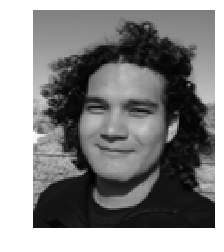

               U


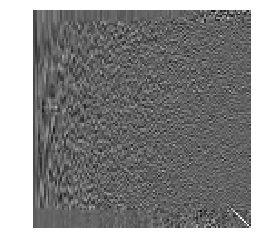

               D


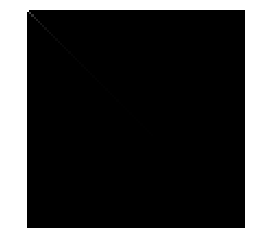

           V transpose


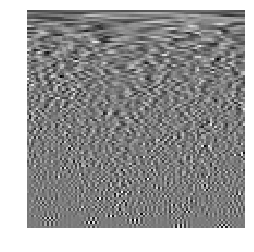

In [4]:
image = read_pgm(filename)
print(" "*15+"A")
display_pgm(image) #Display original pgm image
U, d, Vt = np.linalg.svd(image, full_matrices=True) #perfrom SVD
D = np.diag(d) #Produces a diagonal matrix from the singular values array obtained from linalg.svd

def scale_matrix(a, minimum, max_min_diff): #a is a 1-D array, scale matrix for display in pgm format with range [0,255]
    for i in range(a.shape[0]):
        a[i] = 255*((a[i] - minimum)/max_min_diff)

print(" "*15+"U")
args = [np.min(U), (np.max(U) - np.min(U))]
np.apply_along_axis(scale_matrix, 1, U, *args)
display_pgm(U) #Orthonormal matrix U scaled to by 255

print(" "*15+"D")
args = [np.min(D), (np.max(D) - np.min(D))]
np.apply_along_axis(scale_matrix, 1, D, *args)
display_pgm(D) #Diagonal matrix D

print(" "*11+"V transpose")
args = [np.min(Vt), (np.max(Vt) - np.min(Vt))]
np.apply_along_axis(scale_matrix, 1, Vt, *args)
display_pgm(Vt) #Orthonormal matrix V transpose

The following are the approximations of $A$ with $\rho$ singular values and columns of $U$ and $V$ for $1\leq\rho\leq 100$

    -----------------------
             p = 1
    -----------------------


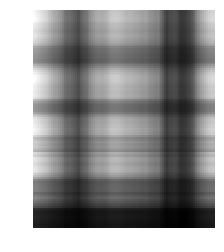

    -----------------------
             p = 2
    -----------------------


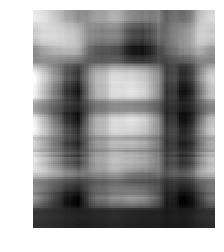

    -----------------------
             p = 3
    -----------------------


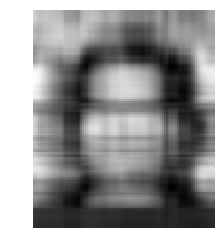

    -----------------------
             p = 4
    -----------------------


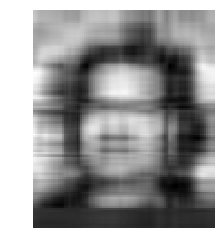

    -----------------------
             p = 5
    -----------------------


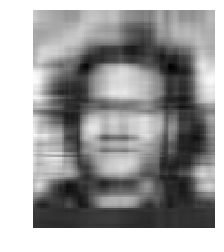

    -----------------------
             p = 10
    -----------------------


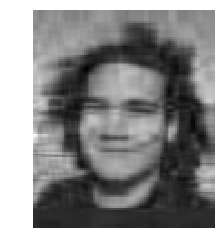

    -----------------------
             p = 15
    -----------------------


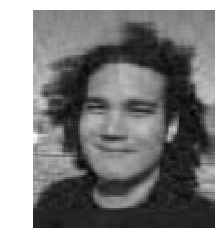

    -----------------------
             p = 20
    -----------------------


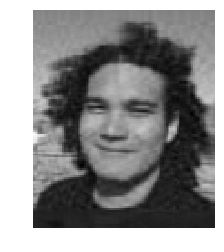

    -----------------------
             p = 30
    -----------------------


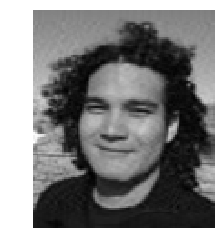

    -----------------------
             p = 40
    -----------------------


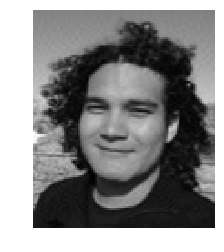

    -----------------------
             p = 50
    -----------------------


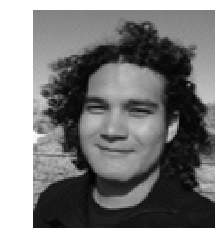

    -----------------------
             p = 60
    -----------------------


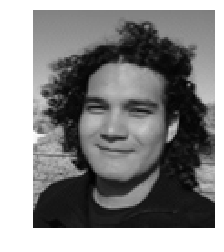

    -----------------------
             p = 70
    -----------------------


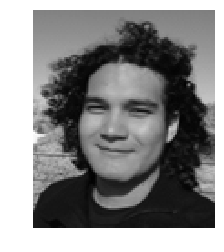

    -----------------------
             p = 80
    -----------------------


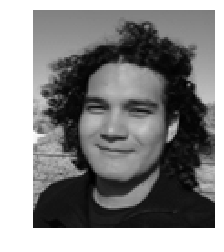

    -----------------------
             p = 90
    -----------------------


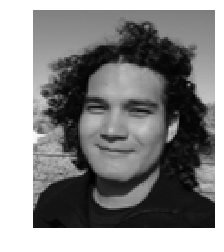

    -----------------------
             p = 100
    -----------------------


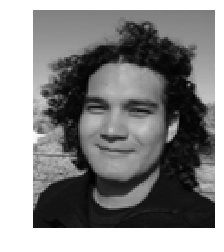

In [5]:
# perform SVD, since we take up to 100 singular values we can reduce the size of U, we do this by setting 
# full_matrices = False which sets the size of U to be equal to V in this particular case
U, d, Vt = np.linalg.svd(image, full_matrices=False)
D = np.diag(d)
i = 1 # number of singular values

# Two lists are created to store the Max error, Mean error and compression in order to split the tabulated results
# in two tables using the pandas library
tabularData = [[],[],[]]
tabularData2 = [[],[],[]]
cols = ["1","2","3","4","5","10","15","20","30","40","50","60","70","80","90"] #label of table data columns
indx = ["Max error","Mean error", "Compression %"] #labels of index column
minCompression = 0 # we are interested on the negative compression hence we initialize this variable to 0
p_for_minimum_comp = 1 # singular value that corresponds to the minimum negative compression

while (i <= 100):
    print(" "*4+"-"*23)
    print(" "*13+"p = %d"%i)
    print(" "*4+"-"*23)
    
    A = U[:,:i]@D[:i,:i]@Vt[:i,:] # Represent up to i singular values
    display_pgm(A)
    maxError = abs(np.max(image - A)) #set maximum absolute error for each approximation
    meanError = abs(np.mean(np.absolute(image - A))) #set mean absolute error for each approximation
    kp = U[:,:i].size + D[:i,:i].size + Vt[:i,:].size #number of real numbers used in the pth approximation
    
    compression = (1 - kp/12000.0) * 100
    if compression < minCompression and i < 100:
        minCompression = compression
        p_for_minimum_comp = i
    # compression value should always be positive so we set compression to n/a if the value is negative
    if compression <= 0 and i < 100:
        compression = "n/a"
        
    # We splits our results into two lists for the tabulation 
    if i < 30:
        tabularData[0].append("%.2f"%maxError)
        tabularData[1].append("%.2f"%meanError)
        tabularData[2].append(("%.2f"%compression) if isinstance(compression, float) else compression)
    elif i < 100:
        tabularData2[0].append("%.2f"%maxError)
        tabularData2[1].append("%.2f"%meanError)
        tabularData2[2].append(("%.2f"%compression) if isinstance(compression, float) else compression)
        
    if i < 5: i+=1 
    elif i < 20: i+=5 
    else: i+=10
        
# We create the dataframes to generate the tables
df = pd.DataFrame(columns = cols[:8], data = tabularData, index = indx)
df2 = pd.DataFrame(columns = cols[8:], data = tabularData2, index = indx)

In [6]:
df.rename_axis("p", axis="columns")

p,1,2,3,4,5,10,15,20
Max error,134.11,147.73,108.69,103.77,111.30,74.02,62.42,54.54
Mean error,34.78,26.32,21.08,18.06,15.29,9.40,6.55,5.00
Compression %,98.16,96.30,94.42,92.53,90.62,80.83,70.62,60.00


In [7]:
df2.rename_axis("p", axis="columns")

p,30,40,50,60,70,80,90
Max error,24.92,16.01,9.09,6.09,2.58,1.17,0.58
Mean error,3.11,2.03,1.31,0.78,0.41,0.18,0.06
Compression %,37.50,13.33,n/a,n/a,n/a,n/a,n/a


In [8]:
print("The smallest value of ρ for which compression is negative is p = %d" %p_for_minimum_comp)
print("with minimum compression value percentage of %.2f\n"%minCompression)

The smallest value of ρ for which compression is negative is p = 90
with minimum compression value percentage of -132.50



When the number of real numbers used to approximate a matrix is higher than the number of real numbers used in the original matrix we obtain a negative measurement of the compression ratio. hence the difference in memory usage is negligible.<br><br>
We obtain an image with sufficient visual quality with the approximation of $A$ with 30 singular values.
This approximation shows with acceptable clarity the main characteristics that distinguish the original image.
Furthermore we have that:
<br><br>
Compression = 37.5%<br>
Mean error = 3.11
<br><br>
That is, there is a significant reduction in the amount of memory needed to store this image and a low error in its representation.

### Principal components to find a geographic structure

This problem is based on the geographic analysis of genetic SNP data from Novembre et al
2008, Nature, doi:10.1038/nature0733.<br>
The data matrix stored in snps.txt is a binary matrix with 100 rows and 2734 columns. Each
row corresponds to an individual person and each column corresponds to a position in the
individual’s genome which is known to vary between individuals, known as a single nucleotide
polymorphism or SNP. So each row is a trial and each column is a measurement.<br>
The data comes from a geographically structured population with an unknown number of subpopulations. The task here is to perform a principal components analysis of the data to determine the number of populations and allocate individuals to each population.

In [9]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

At = np.loadtxt('/home/manu/snps.txt') # read transpose matrix from file
A = np.transpose(At) # Get transpose to have measurements as rows and trials as columns
B = A
# Centre matrix by substracting the row mean from each element.
def centre_matrix(row): 
    mean = np.mean(row)
    for i in range(row.shape[0]):
        row[i] -= mean
np.apply_along_axis(centre_matrix, 1, B) # Created centre matrix B
B = 1/(math.sqrt(99)) * B
P, d, Vt = np.linalg.svd(B, full_matrices=True) # Perform SVD of B
print("The following table shows the first 5 entries of each of the first 5 principal component vectors:")
df = pd.DataFrame(data = P[:5,:5], columns = ["P1","P2","P3","P4","P5"])
df

The following table shows the first 5 entries of each of the first 5 principal component vectors:


,P1,P2,P3,P4,P5
0,0.003096,-0.000771,-0.006684,0.024670,-0.001171
1,-0.009673,0.002020,0.003157,-0.010490,0.013534
2,-0.011102,-0.003414,0.012076,0.032259,-0.006886
3,0.029603,-0.023103,-0.005130,-0.019624,0.016439
4,0.020292,0.026304,-0.018164,-0.007532,0.051009


In [10]:
print("The following table shows the singular values of each of the 100 principal components denoted by P:")
df = pd.DataFrame(data = d, columns = ["Singular values"])
df.rename_axis("P", axis="columns")

The following table shows the singular values of each of the 100 principal components denoted by P:


P,Singular values
0,5.094467e+00
1,3.480919e+00
2,3.022654e+00
3,3.009980e+00
4,2.997689e+00
5,2.967511e+00
6,2.964897e+00
7,2.951021e+00
8,2.944887e+00
9,2.921255e+00


The following projection matrix $L$ represents each data vector along the first two principal components
in which the entry $L_{ij}$ corresponds to the amount of the $i$th individual in the direction of the $j$th
principal component.

In [14]:
Pt = np.transpose(P[:,:2]) # obtain transpose matrix from the first 2 principal component vectors
L = Pt.dot(A) # Projection matrix
L = np.transpose(L)
#print(" "*12+"Matrix L")
#print(L)
print("\nThe table representation of the matrix is included below:")
df = pd.DataFrame(data = L)
df.columns.name = "Matrix L"
df
#L.shape


The table representation of the matrix is included below:


Matrix L,0,1
0,0.548943,5.435726
1,1.612030,3.008575
2,1.670917,4.244549
3,1.721909,-2.592231
4,4.218372,-2.975438
5,2.980511,-1.629998
6,2.114869,5.287016
7,3.455240,-3.681757
8,4.071513,-2.879862
9,2.364318,3.661365


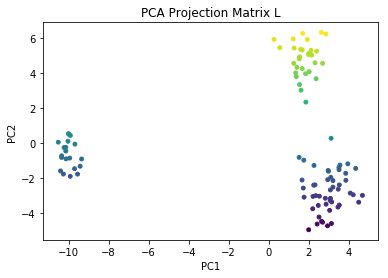

In [12]:
color = [str(value/255) for value in L[:,1]] # Set color according to value along PC2
plt.scatter(L[:,0],L[:,1],s=15,c=color) # Plot L
plt.title("PCA Projection Matrix L")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

As we can observe in the plot that there are 3 distinct subpopulations.<br>
We can partition the space in the following way:<br><br>
An individual belongs to a Subpopulation $S_{1}$ if the condition $PC_{1} < -8$ and $PC_{2} < 2$ holds. <br>
An individual belongs to a Subpopulation $S_{2}$ if the condition $PC_{1} > -2$ and $PC_{2} < 1.5$ holds. <br>
An individual belongs to a Subpopulation $S_{3}$ if the condition $PC_{1} > -2$ and $PC_{2} \geq 1.5$ holds.<br><br>
We can easily see that $S_{2}$ is the largest population.
The following table includes a list of the individuals in $S_{2}$ corresponding to row numbers:

In [13]:
print("List of individuals in S2 corresponding to row numbers\n")
counter = 0
for i in range(100):
    if L[i,0] > -2 and L[i,1] < 1.5:
        print(" ",i)
        counter +=1
print("\nTotal of individuals in S2: %d"%counter)

List of individuals in S2 corresponding to row numbers

  3
  4
  5
  7
  8
  10
  15
  16
  17
  19
  20
  22
  24
  28
  32
  33
  36
  40
  43
  44
  45
  47
  52
  53
  55
  57
  58
  59
  61
  63
  67
  68
  69
  70
  73
  75
  76
  79
  80
  83
  84
  85
  87
  88
  90
  93
  94
  97
  99

Total of individuals in S2: 49
